In [1]:
import cv2
from keras.preprocessing.image import array_to_img, img_to_array, load_img

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.special

In [3]:
plt.style.use("ggplot")

In [4]:
def rayleigh_noise(size, a, b):
    x = np.linspace(1, size, size)
    
    z_bar = a + np.sqrt(math.pi * b / 4)
    z_var = (b * (4 - math.pi)) / 4

    def rayleigh_cal(x, a, b):
        return (2 / b) * (x - a) * np.exp(-((x-a)**2) / b)

    out = np.where(x < a, 0, rayleigh_cal(x, a, b))
    plt.plot(out)
    return out, z_bar, z_var

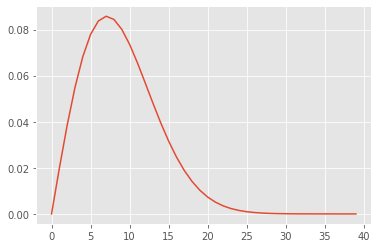

In [5]:
arr, mean, var = rayleigh_noise(40, 1, 100)

In [65]:
def gaussian_noise_pdf(size):
    x = np.linspace(1, size, size)
    
    x_mean = np.mean(x)
    x_std = np.std(x)
    
    out = np.exp(-((x - x_mean)**2)/(2 * x_std))
    out = (1 / (np.sqrt(2 * 3.14 * x_std))) * out
    
    my_vars = 1 / (np.sqrt(2  * 3.14) * x_std)
    
    plt.plot(out)
    plt.text(x_mean, my_vars, "$1/\sqrt{2\pi}\sigma$", fontsize=10)
    return out, x_mean, x_std

In [8]:
def erlang_gamma_noise(size, a, b):
    x = np.linspace(1, size, size)
    
    z_bar = b / a
    std = b / (a**2)
    
    def pos_part(x, a, b):
        out = np.power(a, b) * np.power(x, b-1)
        out = (out / (math.factorial(b-1))) * np.exp(-a * x)
        return out
    
    out = np.where(x < 0, 0, pos_part(x, a, b))
    K = (a * (np.power(b-1, b-1)) / scipy.special.factorial(b-1)) * np.exp(-(b-1))
    
    plt.plot(out)
    plt.text((b-1)/a, K, "$K$")
    
    return out

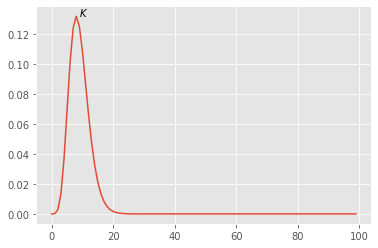

In [9]:
er_arr = erlang_gamma_noise(100, 1, 10)

In [10]:
def uniform_noise(size, a, b):
    x = np.linspace(1, size, size)
    
    z_mean = (a + b) / 2
    z_var = (b - a) / 12
    
    out_x = x >= a
    out_y = b >= x
    out_x = out_x & out_y
    out = np.where(out_x == True, (1 / (b - a)), 0)
    
    plt.plot(out)
    plt.text(0, (1 / (b-a)), "$Cut-off$")
    print(1 / (b-a))
    return out

0.02


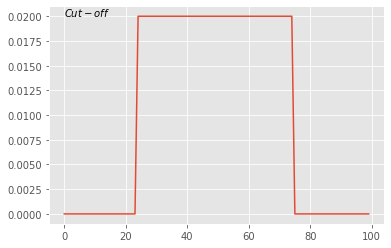

In [11]:
uni_arr = uniform_noise(100, 25, 75)

In [12]:
def read(image):
    image = load_img(image)
    image = img_to_array(image)
    return image

In [23]:
def gaussian_pdf(x, x_mean=0, x_std=1):
    x_mean = x_mean
    x_std = x_std
    
    out = np.exp(-((x - x_mean)**2)/(2 * x_std))
    out = (1 / (np.sqrt(2 * np.pi) * x_std)) * out
    return out